In [2]:
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Loading the dataset
fashion_mnist = keras.datasets.fashion_mnist 

# Splitting into testing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [22]:
# Minimal test to view the data -ignore
train_images.shape
train_images[5, 19, 21]


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

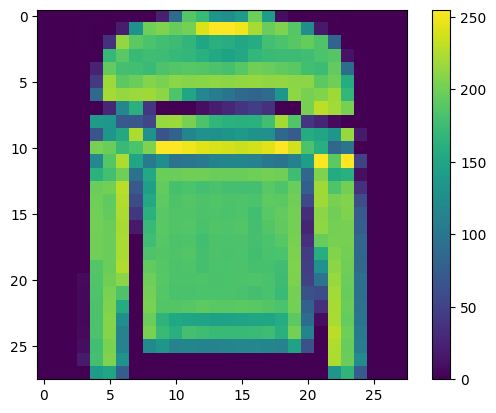

In [30]:
# To view the classes of data provided. -- i love this
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
# To Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [32]:
# To build the Neural Model Architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax') #output layer
])

2023-03-20 10:20:20.448073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
# Compiling the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
# training the Model
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1738 - accuracy: 0.9337


In [41]:
# Testing the Data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8902
Test accuracy:  0.8902000188827515


313/313 [==============================] - 1s 2ms/step
Pullover


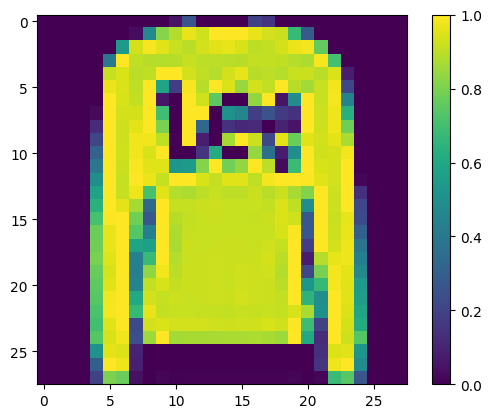

In [49]:
# Now Prediction ensues
predictions = model.predict(test_images)
print(class_names [np.argmax(predictions[1])])

plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

1/1 [==============================] - 0s 27ms/step


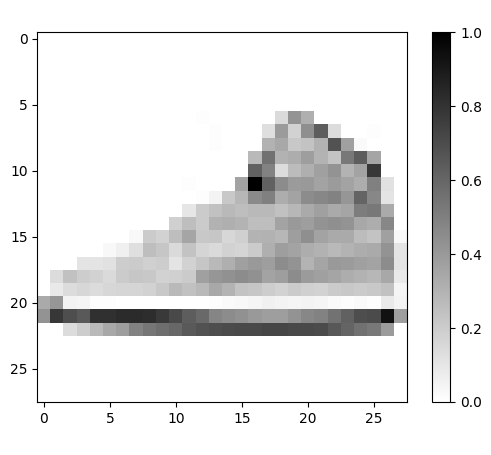

In [54]:
COLOR='white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number(): 
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num=int(num)
            if 0 <= num <=1000:
                return int(num)
            else:
                print('Try again....')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)